In [1]:
# Import libraries and dependencies
import os
import pandas as pd
import alpaca_trade_api as tradeapi
import datetime
import matplotlib.pyplot as plt
from MCForecastTools import MCSimulation


In [2]:
# Load .env enviroment variables
from dotenv import load_dotenv
load_dotenv()

# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

Python-dotenv could not parse statement starting at line 1


In [3]:
# Set Alpaca API key and secret key
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [4]:
# Verify that Alpaca key and secret were correctly loaded
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [5]:
# Timeframes for day, year, 3 year, 5 year
timeframe = "1D"

today_date = str(datetime.datetime.now()).split()[0]
one_year_ago = str(datetime.datetime.now() - datetime.timedelta(days=1*365)).split()[0]
three_year_ago = str(datetime.datetime.now() - datetime.timedelta(days=3*365)).split()[0]
five_year_ago = str(datetime.datetime.now() - datetime.timedelta(days=5*365)).split()[0]
today_date, one_year_ago, three_year_ago, five_year_ago

('2021-02-24', '2020-02-25', '2018-02-25', '2016-02-26')

In [6]:
# Set start and end datetimes of 5 years from Today
start_date = pd.Timestamp(five_year_ago, tz="America/New_York").isoformat()
end_date = pd.Timestamp(today_date, tz="America/New_York").isoformat()
start_date, end_date

('2016-02-26T00:00:00-05:00', '2021-02-24T00:00:00-05:00')

In [7]:
# PULL ALL DATA FROM ALPACA, SET DATAFRAMES BASED ON ASSET TYPE

In [8]:
#Set ticker for SPY Portfolio
spy_ticker = ['SPY']

In [9]:
# Get 5 year's worth of historical data for SPY Portfolio
spy_df = api.get_barset(
    spy_ticker,
    timeframe,
    start=start_date,
    end=end_date
).df

spy_df

SPY                                    
                             open      high     low   close    volume
time                                                                 
2020-10-01 00:00:00-04:00  337.69  338.7400  335.01  337.03  77057063
2020-10-02 00:00:00-04:00  331.70  337.0126  331.19  333.87  72797429
2020-10-05 00:00:00-04:00  336.06  339.9600  336.01  339.73  38540997
2020-10-06 00:00:00-04:00  339.92  342.1700  334.38  334.94  74231873
2020-10-07 00:00:00-04:00  338.12  341.6300  338.09  340.73  40579189
...                           ...       ...     ...     ...       ...
2021-02-18 00:00:00-05:00  389.59  391.5150  387.74  390.75  52370380
2021-02-19 00:00:00-05:00  392.07  392.3800  389.55  390.02  66794115
2021-02-22 00:00:00-05:00  387.06  389.6200  386.74  387.11  56604869
2021-02-23 00:00:00-05:00  384.66  388.9450  380.20  387.50  98333278
2021-02-24 00:00:00-05:00  386.33  392.1101  385.27  391.88  44266116

[100 rows x 5 columns]

In [10]:
# Set tickers for Green Auto Portfolio
green_auto_tickers = ['TSLA', 'SBE', 'PLUG', 'F', 'GM', 'BLNK', 'QS', 'ALB']

In [11]:
# Get 5 year's worth of historical data for Green Auto Portfolio
green_auto_df = api.get_barset(
    green_auto_tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

green_auto_df

ALB                                        BLNK  \
                             open      high       low   close   volume   open   
time                                                                            
2020-10-01 00:00:00-04:00   90.00   90.9699   86.4700   86.73  2056590  10.66   
2020-10-02 00:00:00-04:00   85.44   91.0789   84.5700   89.29  1783989   9.90   
2020-10-05 00:00:00-04:00   91.26   95.8900   91.1400   94.77  2796290  11.00   
2020-10-06 00:00:00-04:00   96.28   96.9691   93.5200   93.78  2009249  11.24   
2020-10-07 00:00:00-04:00   96.00   97.9869   95.6000   96.68  1730383  11.00   
...                           ...       ...       ...     ...      ...    ...   
2021-02-18 00:00:00-05:00  150.48  151.2500  140.7300  141.46  3912746  45.75   
2021-02-19 00:00:00-05:00  144.76  156.9799  144.4950  155.93  3548466  45.67   
2021-02-22 00:00:00-05:00  154.14  159.8840  153.6016  156.49  2069371  44.89   
2021-02-23 00:00:00-05:00  150.21  155.2650  141.1400  154.61  2090921  38.35   
2021-02-24 00:00:00-05:00  155.00  162.1300  152.7900  160.93  1225357  39.06   

                                                            ...    SBE  \
                            high      low   close   volume  ...   open   
time                                                        ...          
2020-10-01 00:00:00-04:00  11.08  10.3000  10.630  4841646  ...  16.00   
2020-10-02 00:00:00-04:00  10.99   9.8700  10.855  3588317  ...  14.45   
2020-10-05 00:00:00-04:00  11.45  10.9600  11.070  2358839  ...  15.47   
2020-10-06 00:00:00-04:00  11.34  10.4100  10.800  3261997  ...  14.63   
2020-10-07 00:00:00-04:00  11.05  10.2000  10.315  3112918  ...  14.17   
...                          ...      ...     ...      ...  ...    ...   
2021-02-18 00:00:00-05:00  46.60  42.6800  44.480  6987318  ...  37.00   
2021-02-19 00:00:00-05:00  47.18  45.1000  46.100  4337416  ...  37.00   
2021-02-22 00:00:00-05:00  45.55  41.3600  42.200  6492258  ...  36.40   
2021-02-23 00:00:00-05:00  39.80  32.1200  38.780  9687029  ...  34.90   
2021-02-24 00:00:00-05:00  42.70  38.1201  41.755  3935578  ...  33.01   

                                                                TSLA  \
                              high      low   close   volume    open   
time                                                                   
2020-10-01 00:00:00-04:00  16.1000  15.2100  15.280  5030398  440.76   
2020-10-02 00:00:00-04:00  15.3800  14.3600  15.370  4866681  421.39   
2020-10-05 00:00:00-04:00  15.4935  14.5000  14.930  6316892  423.35   
2020-10-06 00:00:00-04:00  14.6300  13.6600  13.900  9745852  423.79   
2020-10-07 00:00:00-04:00  14.3900  13.2500  13.720  5294299  419.87   
...                            ...      ...     ...      ...     ...   
2021-02-18 00:00:00-05:00  37.4300  35.7900  36.380  1592812  780.90   
2021-02-19 00:00:00-05:00  37.1300  36.0100  36.340  1263720  795.00   
2021-02-22 00:00:00-05:00  37.9800  36.1148  36.350  1570025  762.64   
2021-02-23 00:00:00-05:00  34.9000  26.7318  33.090  3811887  662.13   
2021-02-24 00:00:00-05:00  35.6599  33.0000  34.415  1115711  711.85   

                                                                  
                               high      low     close    volume  
time                                                              
2020-10-01 00:00:00-04:00  448.8800  434.420  447.8100  46917693  
2020-10-02 00:00:00-04:00  439.1300  415.000  415.2699  64001779  
2020-10-05 00:00:00-04:00  433.6400  419.330  425.5000  42071439  
2020-10-06 00:00:00-04:00  428.7799  406.050  413.7001  46076914  
2020-10-07 00:00:00-04:00  429.9000  413.845  425.1900  40832057  
...                             ...      ...       ...       ...  
2021-02-18 00:00:00-05:00  794.6900  776.270  787.3000  16958719  
2021-02-19 00:00:00-05:00  796.7899  777.370  781.5000  18042330  
2021-02-22 00:00:00-05:00  768.5000  710.200  714.7100  34459602  
2021-02-23 00:00:00-05:00  713.6099  619.000 

In [12]:
# Set tickers for Green Building Portfolio
green_building_tickers = ['TT', 'AVB', 'ROK', 'AYI']

In [13]:
# Get 5 year's worth of historical data for Green Building Portfolio
green_building_df = api.get_barset(
    green_building_tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

green_building_df.head()

AVB                                      AYI  \
                             open    high     low   close   volume    open   
time                                                                         
2020-10-01 00:00:00-04:00  149.72  155.63  149.61  155.60  1682539  103.42   
2020-10-02 00:00:00-04:00  153.32  159.02  151.59  158.07  2058823  100.26   
2020-10-05 00:00:00-04:00  159.04  160.84  156.71  160.52  1732680  106.99   
2020-10-06 00:00:00-04:00  161.49  162.33  157.79  158.54  1722635  110.75   
2020-10-07 00:00:00-04:00  159.12  160.13  155.75  156.85  1511135  111.38   

                                                                 ROK          \
                             high       low   close   volume    open    high   
time                                                                           
2020-10-01 00:00:00-04:00  104.65  102.0300  102.67   907770  222.67  224.36   
2020-10-02 00:00:00-04:00  106.05  100.2600  105.61   669197  215.72  225.49   
2020-10-05 00:00:00-04:00  110.69  106.6000  110.00   926655  227.13  233.25   
2020-10-06 00:00:00-04:00  111.46  108.9206  109.70   930183  233.60  238.23   
2020-10-07 00:00:00-04:00  114.76  111.3200  113.29  1056306  235.95  238.28   

                                                         TT                  \
                               low   close   volume    open    high     low   
time                                                                          
2020-10-01 00:00:00-04:00  216.360  219.52  1032469  123.06  123.50  121.27   
2020-10-02 00:00:00-04:00  215.510  223.38   738637  120.74  124.92  120.08   
2020-10-05 00:00:00-04:00  226.225  233.12  1270861  125.46  128.24  125.00   
2020-10-06 00:00:00-04:00  232.410  232.79   816047  127.62  128.95  126.21   
2020-10-07 00:00:00-04:00  233.390  236.42   601879  127.99  129.98  127.37   

                                            
                            close   volume  
time                                        
2020-10-01 00:00:00-04:00  121.93  1601387  
2020-10-02 00:00:00-04:00  123.86  1654962  
2020-10-05 00:00:00-04:00  126.94  1410194  
2020-10-06 00:00:00-04:00  126.61  1977053  
2020-10-07 00:00:00-04:00  127.89  1149648

In [14]:
# Set tickers for Green Energy Portfolio
green_energy_tickers = ['REGI', 'LNG', 'RUN', 'DQ', 'TPIC', 'NEE', 'AGR', 'ETN', 'ORA']

In [15]:
# Get 5 year's worth of historical data for Green Energy Portfolio
green_energy_df = api.get_barset(
    green_energy_tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

green_energy_df.head()

AGR                                         DQ  \
                            open    high      low  close     volume    open   
time                                                                          
2020-09-30 00:00:00-04:00    NaN     NaN      NaN    NaN        NaN     NaN   
2020-10-01 00:00:00-04:00  50.61  51.690  50.3700  51.21  1020409.0  137.78   
2020-10-02 00:00:00-04:00  50.78  52.625  50.5026  52.35   929250.0  142.23   
2020-10-05 00:00:00-04:00  52.71  53.665  52.3600  53.59   698685.0  152.50   
2020-10-06 00:00:00-04:00  53.56  54.380  52.8350  53.82   733353.0  167.56   

                                                                 ...     RUN  \
                             high      low     close     volume  ...    open   
time                                                             ...           
2020-09-30 00:00:00-04:00     NaN      NaN       NaN        NaN  ...     NaN   
2020-10-01 00:00:00-04:00  150.11  136.885  149.1600  1219029.0  ...  79.415   
2020-10-02 00:00:00-04:00  151.57  137.570  148.7900  1091652.0  ...  77.510   
2020-10-05 00:00:00-04:00  168.77  151.730  168.0000  1310142.0  ...  78.000   
2020-10-06 00:00:00-04:00  178.49  158.700  172.5298   959660.0  ...  77.845   

                                                             TPIC         \
                            high    low  close      volume   open   high   
time                                                                       
2020-09-30 00:00:00-04:00    NaN    NaN    NaN         NaN  28.38  29.41   
2020-10-01 00:00:00-04:00  82.42  77.77  80.01  10818553.0  29.30  30.36   
2020-10-02 00:00:00-04:00  80.34  75.84  76.49   8180627.0  29.35  30.06   
2020-10-05 00:00:00-04:00  79.86  76.17  78.64   6668846.0  29.58  31.09   
2020-10-06 00:00:00-04:00  80.20  74.86  78.57   7230361.0  31.20  33.00   

                                                    
                              low  close    volume  
time                                                
2020-09-30 00:00:00-04:00  28.220  28.96  354963.0  
2020-10-01 00:00:00-04:00  29.105  29.67  520432.0  
2020-10-02 00:00:00-04:00  29.010  29.18  610051.0  
2020-10-05 00:00:00-04:00  29.310  31.09  453793.0  
2020-10-06 00:00:00-04:00  30.400  31.35  719446.0  

[5 rows x 45 columns]

In [16]:
# Set tickers for Green Agriculture Portfolio
green_agriculture_tickers = ['TRMB', 'A', 'CWCO', 'XYL']

In [17]:
# Get 5 year's worth of historical data for Green Agriculture Portfolio
green_agriculture_df = api.get_barset(
    green_agriculture_tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

green_agriculture_df.head()

A                                       CWCO  \
                             open     high       low   close   volume   open   
time                                                                           
2020-10-01 00:00:00-04:00  101.77  102.410  100.5400  101.22   975690  10.41   
2020-10-02 00:00:00-04:00  100.21  101.275   99.8127  100.01  1021298  10.14   
2020-10-05 00:00:00-04:00  100.99  103.460  100.9600  103.09  1242377  10.65   
2020-10-06 00:00:00-04:00  103.12  103.330  101.4800  101.61  1563144  11.10   
2020-10-07 00:00:00-04:00  102.47  104.750  102.4200  103.88  1380762  10.86   

                                                        TRMB                \
                            high    low  close volume   open   high    low   
time                                                                         
2020-10-01 00:00:00-04:00  10.56  10.13  10.33  65494  48.76  49.68  48.63   
2020-10-02 00:00:00-04:00  10.60  10.14  10.49  36770  47.97  49.62  47.51   
2020-10-05 00:00:00-04:00  11.00  10.65  11.00  46253  49.71  51.13  49.69   
2020-10-06 00:00:00-04:00  11.15  10.76  10.82  61216  50.72  50.88  48.88   
2020-10-07 00:00:00-04:00  11.14  10.86  11.06  33710  49.72  50.67  49.51   

                                             XYL                          \
                           close   volume   open   high      low   close   
time                                                                       
2020-10-01 00:00:00-04:00  48.87   733584  84.50  84.98  81.9092  82.555   
2020-10-02 00:00:00-04:00  49.31   474327  80.95  85.02  80.9500  84.370   
2020-10-05 00:00:00-04:00  50.72   703321  85.13  86.52  85.0000  86.340   
2020-10-06 00:00:00-04:00  48.88   920546  87.24  88.60  85.9200  86.510   
2020-10-07 00:00:00-04:00  50.50  1301299  87.25  88.82  87.1320  88.200   

                                    
                            volume  
time                                
2020-10-01 00:00:00-04:00  1130774  
2020-10-02 00:00:00-04:00   954568  
2020-10-05 00:00:00-04:00   642986  
2020-10-06 00:00:00-04:00   999337  
2020-10-07 00:00:00-04:00   754425

In [18]:
# CREATE FUNCTIONS FOR MARKET ANALYSIS OF PORTFOLIOS

In [19]:
# Calculate mean 
def calculate_mean(portfolio_ticker):
    sum = 0
    length = 0
    for value in portfolio_ticker:
        sum = sum + value
        length = length + 1
    return sum / length

In [20]:
# Calculate variance 
def calculate_variance(portfolio_ticker):
    sum = 0
    length = 0
    mean_value = calculate_mean(portfolio_ticker)
    for value in portfolio_ticker:
        sum = sum + (value - mean_value) ** 2
        length = length + 1
    return sum / (length - 1)

In [21]:
# Calculate standard deviation 
def calculate_standard_deviation(portfolio_ticker):
    return (calculate_variance(portfolio_ticker)) ** (1 / 2)

In [22]:
# Compare stock volatity with underlying market
def compare_volatility(stock_std, spy_std):
    if stock_std > spy_std:
        print("The stock is more volatile than the market.")
    else:
        print("The stock is less volatile than the market.")

In [23]:
# Calculate the annual average return
year_trading_days = 252

def average_annual_return(portfolio):
    return (portfolio.mean() * year_trading_days)

In [24]:
# Calculate the annualized standard deviation
def annualized_standard_deviation(portfolio):
    return (portfolio.std() * (year_trading_days) ** (1 / 2))

In [25]:
# Calculate the sharpe ratios
def sharpe_ratio(portfolio):
    return (average_annual_return(portfolio) / annualized_standard_deviation(portfolio))

In [26]:
# GENERATE MARKET ANALYSIS REPORT FOR SPY PORTFOLIO

In [27]:
# Create df and calculate pct_change for spy
spy_df_closing_prices = pd.DataFrame()

# Fetch the closing prices green_auto portfolio
spy_df_closing_prices["SPY"] = spy_df["SPY"]["close"]

# Drop the time component of the date
spy_df_closing_prices.index = spy_df_closing_prices.index.date

# Compute daily returns
df_daily_returns_spy = spy_df_closing_prices.pct_change().dropna()

# Display sample data
df_daily_returns_spy.head()

,SPY
2020-10-02,-0.009376
2020-10-05,0.017552
2020-10-06,-0.014099
2020-10-07,0.017287
2020-10-08,0.008805


In [28]:
# Get most recent price
spy_recent_price = spy_df["SPY"]["close"][-1]

# Calculate the mean price percent change
spy_mean = calculate_mean(df_daily_returns_spy["SPY"])
    
# Calculate the standard deviation of the percent change
spy_std = calculate_standard_deviation(df_daily_returns_spy["SPY"])

# Print the stock name and calculated statistics
print("SPY")
print(f"Recent Price Pct: {spy_recent_price}")
print(f"Mean Price Pct: {spy_mean}")
print(f"Price Pct std. deviation: {spy_std}")

SPY
Recent Price Pct: 391.88
Mean Price Pct: 0.001571155400469789
Price Pct std. deviation: 0.009725938450642952


In [29]:
# Average annual return for spy portolio
average_annual_return(df_daily_returns_spy)

SPY    0.395931
dtype: float64

In [30]:
# Annualized standard deviation for spy portfolio
annualized_standard_deviation(df_daily_returns_spy)

SPY    0.154394
dtype: float64

In [31]:
# Sharpe ratio for spy portfolio
sharpe_ratio_spy = sharpe_ratio(df_daily_returns_spy)
sharpe_ratio(df_daily_returns_spy)

SPY    2.564413
dtype: float64

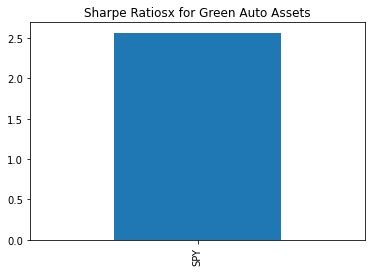

In [32]:
# Plot of Sharpe ratio for spy portfolio
sharpe_ratio_spy.plot.bar(title="Sharpe Ratiosx for Green Auto Assets")

plt.show()

In [33]:
#GENERATE MARKET ANALYSIS REPORT FOR GREEN_AUTO PORTFOLIO

In [34]:
# Create df and calculate pct_change for green_auto portfolio
green_auto_df_closing_prices = pd.DataFrame()

# Fetch the closing prices green_auto portfolio
for stock_ticker in green_auto_tickers:
    green_auto_df_closing_prices[stock_ticker] = green_auto_df[stock_ticker]["close"]

# Drop the time component of the date
green_auto_df_closing_prices.index = green_auto_df_closing_prices.index.date

# Compute daily returns
df_daily_returns_green_auto = green_auto_df_closing_prices.pct_change().dropna()

# Display sample data
df_daily_returns_green_auto.head()

,TSLA,SBE,PLUG,F,GM,BLNK,QS,ALB
2020-11-30,-0.032898,-0.089508,0.003811,-0.000550,-0.026853,-0.098017,0.287170,-0.012707
2020-12-01,0.033029,-0.131571,-0.072134,0.016502,0.018928,-0.122494,-0.241070,-0.000662
2020-12-02,-0.028008,0.002394,-0.015188,-0.004870,-0.002350,0.034763,0.061443,-0.004563
2020-12-03,0.043038,0.108837,-0.009506,0.001631,-0.010432,-0.009642,0.010621,-0.026172
2020-12-04,0.009641,0.012308,0.041946,0.014658,0.006121,0.051007,0.114556,0.056863


TSLA

Recent Price Pct: 731.305
Mean Price Pct: 0.004404006443352514
Price Pct std. deviation: 0.035933997785212765
The stock is more volatile than the market.


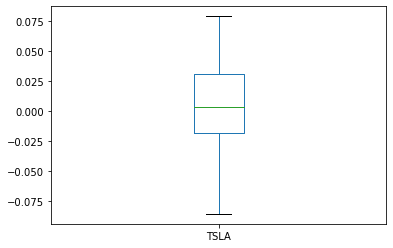



SBE

Recent Price Pct: 34.415
Mean Price Pct: 0.000257497634579996
Price Pct std. deviation: 0.05500684274129559
The stock is more volatile than the market.


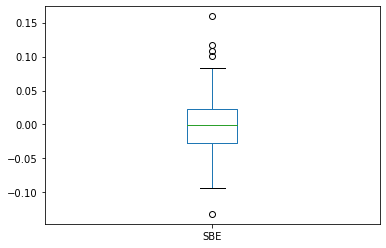



PLUG

Recent Price Pct: 48.9886
Mean Price Pct: 0.013649031674862852
Price Pct std. deviation: 0.08131256247673689
The stock is more volatile than the market.


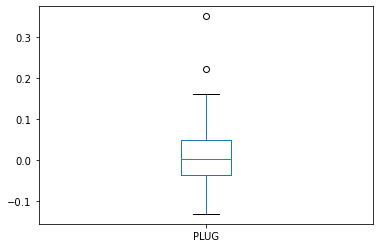



F

Recent Price Pct: 12.1195
Mean Price Pct: 0.005140827874907696
Price Pct std. deviation: 0.023327761425379127
The stock is more volatile than the market.


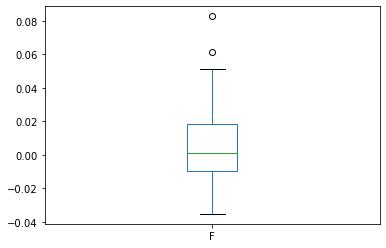



GM

Recent Price Pct: 52.245
Mean Price Pct: 0.002855709686032868
Price Pct std. deviation: 0.026734315282128447
The stock is more volatile than the market.


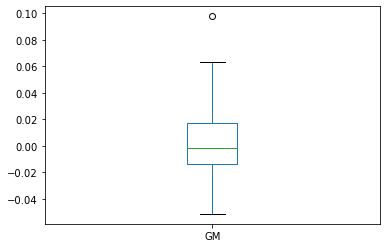



BLNK

Recent Price Pct: 41.755
Mean Price Pct: 0.010890095802807477
Price Pct std. deviation: 0.09400612635025835
The stock is more volatile than the market.


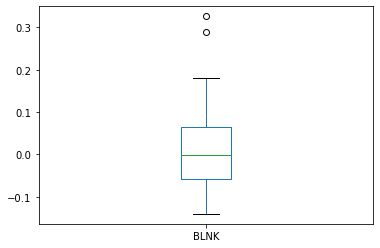



QS

Recent Price Pct: 60.4169
Mean Price Pct: 0.018042256008151385
Price Pct std. deviation: 0.1388519201683467
The stock is more volatile than the market.


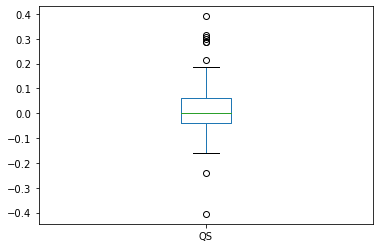



ALB

Recent Price Pct: 160.93
Mean Price Pct: 0.0031713735941150236
Price Pct std. deviation: 0.032867939418273304
The stock is more volatile than the market.


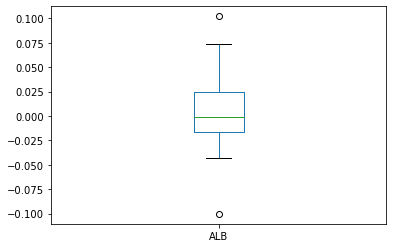

In [35]:
# Loop through the stocks in the green_auto portfolio and compare their performance
# with the sp500.
for stock_ticker in df_daily_returns_green_auto:

    # Get most recent price
    stock_recent_price = green_auto_df[stock_ticker]["close"][-1]

    # Calculate the mean price percent change
    stock_mean = calculate_mean(df_daily_returns_green_auto[stock_ticker])
    
    # Calculate the standard deviation of the percent change
    stock_std = calculate_standard_deviation(df_daily_returns_green_auto[stock_ticker])
    
    # Print the stock name and calculated statistics
    print(f"{stock_ticker}\n")
    print(f"Recent Price Pct: {stock_recent_price}")
    print(f"Mean Price Pct: {stock_mean}")
    print(f"Price Pct std. deviation: {stock_std}")
    
    # Compare the stock's volatility with the underlying market
    compare_volatility(stock_std, spy_std)
    
    # Display daily returns box plot
    df_daily_returns_green_auto[stock_ticker].plot.box()
    plt.show()
    print("\n")

In [36]:
# Average annual return for green_auto portolio
average_annual_return(df_daily_returns_green_auto)

TSLA    1.109810
SBE     0.064889
PLUG    3.439556
F       1.295489
GM      0.719639
BLNK    2.744304
QS      4.546649
ALB     0.799186
dtype: float64

In [37]:
# Annualized standard deviation for green_auto portfolio
annualized_standard_deviation(df_daily_returns_green_auto)

TSLA    0.570435
SBE     0.873207
PLUG    1.290797
F       0.370317
GM      0.424394
BLNK    1.492301
QS      2.204206
ALB     0.521762
dtype: float64

In [38]:
# Sharpe ratios for green_auto portfolio
sharpe_ratio_green_auto = sharpe_ratio(df_daily_returns_green_auto)
sharpe_ratio(df_daily_returns_green_auto)

TSLA    1.945551
SBE     0.074312
PLUG    2.664676
F       3.498326
GM      1.695685
BLNK    1.838975
QS      2.062715
ALB     1.531705
dtype: float64

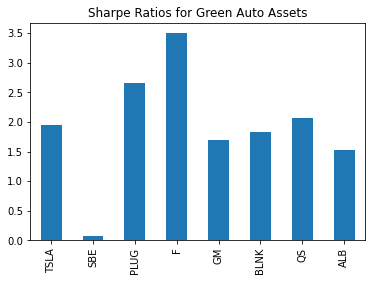

In [39]:
# Plot of Sharpe ratios for green_auto portfolio
sharpe_ratio_green_auto.plot.bar(title="Sharpe Ratios for Green Auto Assets")

plt.show()

In [40]:
#GENERATE MARKET ANALYSIS REPORT FOR GREEN_BUILDING PORTFOLIO

In [41]:
# Create df and calculate pct_change for green_building
green_building_df_closing_prices = pd.DataFrame()

# Fetch the closing prices green_building portfolio
for stock_ticker in green_building_tickers:
    green_building_df_closing_prices[stock_ticker] = green_building_df[stock_ticker]["close"]

# Drop the time component of the date
green_building_df_closing_prices.index = green_building_df_closing_prices.index.date

# Compute daily returns
df_daily_returns_green_building = green_building_df_closing_prices.pct_change().dropna()

 # Display daily returns
df_daily_returns_green_building.head()

,TT,AVB,ROK,AYI
2020-10-02,0.015829,0.015874,0.017584,0.028635
2020-10-05,0.024867,0.015499,0.043603,0.041568
2020-10-06,-0.002600,-0.012335,-0.001416,-0.002727
2020-10-07,0.010110,-0.010660,0.015593,0.032726
2020-10-08,0.014700,0.020720,0.019922,-0.104069


TT

Recent Price Pct: 156.12
Mean Price Pct: 0.002642819206193471
Price Pct std. deviation: 0.016977039165764343
The stock is more volatile than the market.


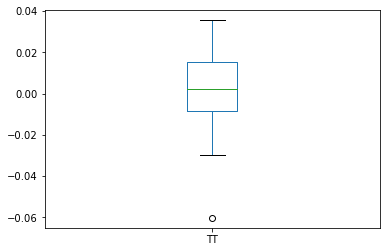



AVB

Recent Price Pct: 184.39
Mean Price Pct: 0.0019154421067604198
Price Pct std. deviation: 0.020271242340861667
The stock is more volatile than the market.


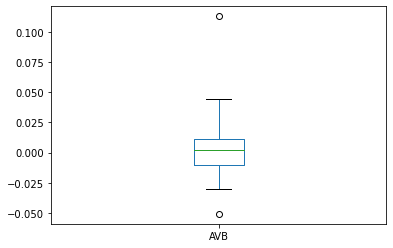



ROK

Recent Price Pct: 247.03
Mean Price Pct: 0.0013508893015234766
Price Pct std. deviation: 0.017810940933208876
The stock is more volatile than the market.


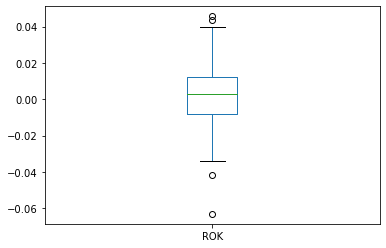



AYI

Recent Price Pct: 127.555
Mean Price Pct: 0.0025730740989462317
Price Pct std. deviation: 0.02762394437984333
The stock is more volatile than the market.


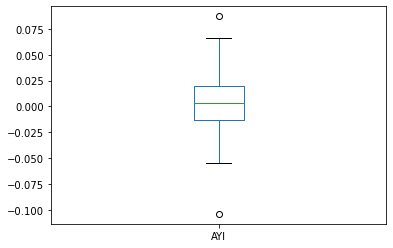

In [42]:
# Loop through the stocks in the green_building portfolio and compare their performance
# with the sp500.
for stock_ticker in df_daily_returns_green_building:

    # Get most recent price
    stock_recent_price = green_building_df[stock_ticker]["close"][-1]

    # Calculate the mean price percent change
    stock_mean = calculate_mean(df_daily_returns_green_building[stock_ticker])
    
    # Calculate the standard deviation of the percent change
    stock_std = calculate_standard_deviation(df_daily_returns_green_building[stock_ticker])
    
    # Print the stock name and calculated statistics
    print(f"{stock_ticker}\n")
    print(f"Recent Price Pct: {stock_recent_price}")
    print(f"Mean Price Pct: {stock_mean}")
    print(f"Price Pct std. deviation: {stock_std}")
    
    # Compare the stock's volatility with the underlying market
    compare_volatility(stock_std, spy_std)

    # Display daily returns box plot
    df_daily_returns_green_building[stock_ticker].plot.box()
    plt.show()
    print("\n")

In [43]:
# Average annual return for green_building portolio
average_annual_return(df_daily_returns_green_building)

TT     0.665990
AVB    0.482691
ROK    0.340424
AYI    0.648415
dtype: float64

In [44]:
# Annualized standard deviation for green_building portfolio
annualized_standard_deviation(df_daily_returns_green_building)

TT     0.269502
AVB    0.321796
ROK    0.282740
AYI    0.438517
dtype: float64

In [45]:
# Sharpe ratios for green_building portfolio
sharpe_ratio_green_building = sharpe_ratio(df_daily_returns_green_building)
sharpe_ratio(df_daily_returns_green_building)

TT     2.471188
AVB    1.499992
ROK    1.204019
AYI    1.478655
dtype: float64

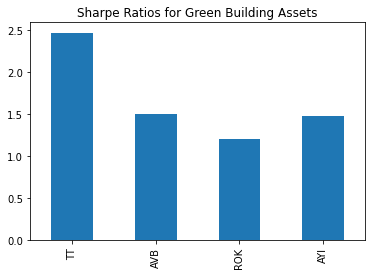

In [46]:
# Plot of Sharpe ratios for green_building portfolio
sharpe_ratio_green_building.plot.bar(title="Sharpe Ratios for Green Building Assets")

plt.show()

In [47]:
#GENERATE MARKET ANALYSIS REPORT FOR GREEN_ENERGY PORTFOLIO

In [48]:
# Create df and calculate pct_change for green_energy
green_energy_df_closing_prices = pd.DataFrame()

# Fetch the closing prices green_energy portfolio
for stock_ticker in green_energy_tickers:
    green_energy_df_closing_prices[stock_ticker] = green_energy_df[stock_ticker]["close"]

# Drop the time component of the date
green_energy_df_closing_prices.index = green_energy_df_closing_prices.index.date

# Compute daily returns
df_daily_returns_green_energy = green_energy_df_closing_prices.pct_change().dropna()

# Display daily returns
df_daily_returns_green_energy.head()

,REGI,LNG,RUN,DQ,TPIC,NEE,AGR,ETN,ORA
2020-10-02,0.032826,0.013351,-0.043995,-0.002481,-0.016515,-0.006415,0.022261,0.020877,0.013534
2020-10-05,0.025319,0.011262,0.028108,0.129108,0.065456,0.024279,0.023687,0.023371,0.022255
2020-10-06,-0.012084,-0.021433,-0.000890,0.026963,0.008363,0.007398,0.004292,-0.006280,0.034349
2020-10-07,0.058678,-0.004724,-0.008018,0.094188,0.118341,0.023616,0.016165,0.023556,0.072342
2020-10-08,0.008205,0.042503,-0.094817,-0.013667,-0.028808,0.014381,0.017188,0.005520,0.025443


REGI

Recent Price Pct: 95.175
Mean Price Pct: 0.006839225775897851
Price Pct std. deviation: 0.04715295114858556
The stock is more volatile than the market.


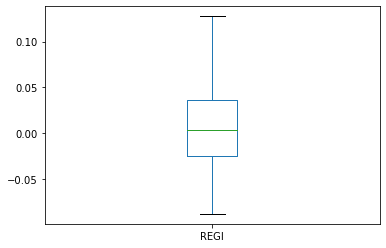



LNG

Recent Price Pct: 70.29
Mean Price Pct: 0.004416162821105998
Price Pct std. deviation: 0.02115220200321982
The stock is more volatile than the market.


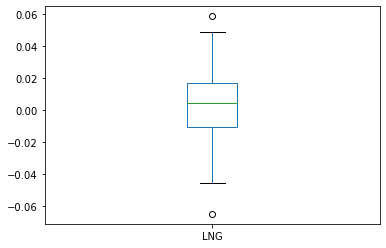



RUN

Recent Price Pct: 62.485
Mean Price Pct: -0.0014840305427730731
Price Pct std. deviation: 0.045209287528643456
The stock is more volatile than the market.


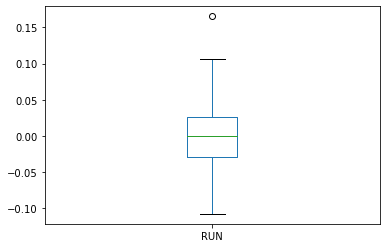



DQ

Recent Price Pct: 103.545
Mean Price Pct: 0.006873852967374471
Price Pct std. deviation: 0.10688013438902003
The stock is more volatile than the market.


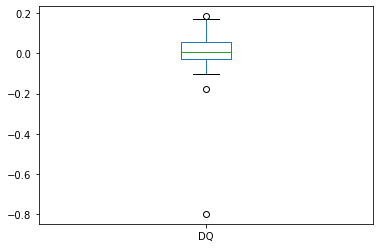



TPIC

Recent Price Pct: 65.69
Mean Price Pct: 0.009053166741009321
Price Pct std. deviation: 0.044986763977691045
The stock is more volatile than the market.


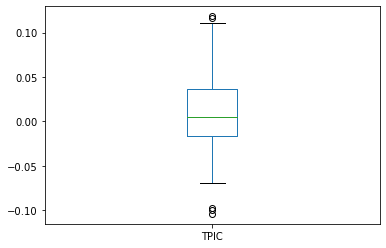



NEE

Recent Price Pct: 73.755
Mean Price Pct: -0.007035752298708795
Price Pct std. deviation: 0.07711201282294483
The stock is more volatile than the market.


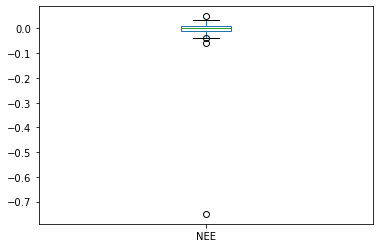



AGR

Recent Price Pct: 45.76
Mean Price Pct: -0.0010194787594829627
Price Pct std. deviation: 0.015283804563307827
The stock is more volatile than the market.


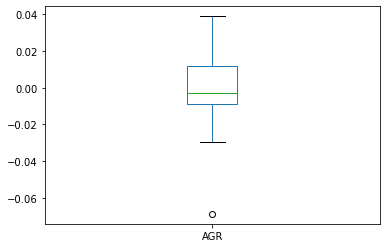



ETN

Recent Price Pct: 133.62
Mean Price Pct: 0.0030185249607535304
Price Pct std. deviation: 0.01720882422497854
The stock is more volatile than the market.


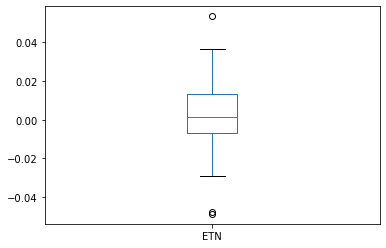



ORA

Recent Price Pct: 103.695
Mean Price Pct: 0.006082448714690047
Price Pct std. deviation: 0.03231180747592008
The stock is more volatile than the market.


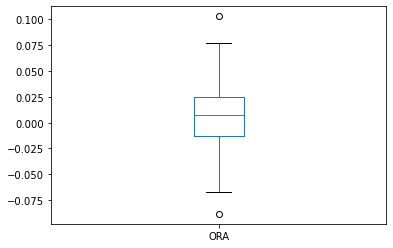

In [49]:
# Loop through the stocks in the green_energy portfolio and compare their performance
# with the sp500.
for stock_ticker in df_daily_returns_green_energy:

    # Get most recent price
    stock_recent_price = green_energy_df[stock_ticker]["close"][-1]

    # Calculate the mean price percent change
    stock_mean = calculate_mean(df_daily_returns_green_energy[stock_ticker])
    
    # Calculate the standard deviation of the percent change
    stock_std = calculate_standard_deviation(df_daily_returns_green_energy[stock_ticker])
    
    # Print the stock name and calculated statistics
    print(f"{stock_ticker}\n")
    print(f"Recent Price Pct: {stock_recent_price}")
    print(f"Mean Price Pct: {stock_mean}")
    print(f"Price Pct std. deviation: {stock_std}")
    
    # Compare the stock's volatility with the underlying market
    compare_volatility(stock_std, spy_std)

    # Display daily returns box plot
    df_daily_returns_green_energy[stock_ticker].plot.box()
    plt.show()
    print("\n")

In [50]:
# Average annual return for green_energy portolio
average_annual_return(df_daily_returns_green_energy)

REGI    1.723485
LNG     1.112873
RUN    -0.373976
DQ      1.732211
TPIC    2.281398
NEE    -1.773010
AGR    -0.256909
ETN     0.760668
ORA     1.532777
dtype: float64

In [51]:
# Annualized standard deviation for green_energy portfolio
annualized_standard_deviation(df_daily_returns_green_energy)

REGI    0.748530
LNG     0.335781
RUN     0.717675
DQ      1.696670
TPIC    0.714143
NEE     1.224115
AGR     0.242623
ETN     0.273182
ORA     0.512934
dtype: float64

In [52]:
# Sharpe ratios for green_energy portfolio
sharpe_ratio_green_energy = sharpe_ratio(df_daily_returns_green_energy)
sharpe_ratio(df_daily_returns_green_energy)

REGI    2.302493
LNG     3.314284
RUN    -0.521093
DQ      1.020948
TPIC    3.194597
NEE    -1.448401
AGR    -1.058881
ETN     2.784478
ORA     2.988254
dtype: float64

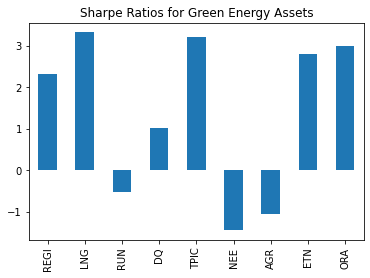

In [53]:
# Plot of Sharpe ratios for green_energy portfolio
sharpe_ratio_green_energy.plot.bar(title="Sharpe Ratios for Green Energy Assets")

plt.show()

In [54]:
#GENERATE MARKET ANALYSIS REPORT FOR GREEN_AGRICULTURE PORTFOLIO

In [55]:
# Create df and calculate pct_change for green_agriculture
green_agriculture_df_closing_prices = pd.DataFrame()

# Generate closing prices green_agriculture portfolio
for stock_ticker in green_agriculture_tickers:
    green_agriculture_df_closing_prices[stock_ticker] = green_agriculture_df[stock_ticker]["close"]

# Drop the time component of the date
green_agriculture_df_closing_prices.index = green_agriculture_df_closing_prices.index.date

# Compute daily returns
df_daily_returns_green_agriculture = green_agriculture_df_closing_prices.pct_change().dropna()

# Display daily returns
df_daily_returns_green_agriculture.head()

,TRMB,A,CWCO,XYL
2020-10-02,0.009003,-0.011954,0.015489,0.021985
2020-10-05,0.028595,0.030797,0.048618,0.023350
2020-10-06,-0.036278,-0.014356,-0.016364,0.001969
2020-10-07,0.033142,0.022340,0.022181,0.019535
2020-10-08,0.012079,0.002695,0.000000,0.018594


TRMB

Recent Price Pct: 76.15
Mean Price Pct: 0.004685080533277851
Price Pct std. deviation: 0.01987731753866405
The stock is more volatile than the market.


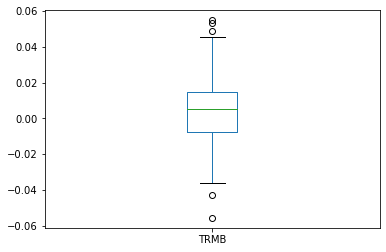



A

Recent Price Pct: 124.45
Mean Price Pct: 0.002193466296706405
Price Pct std. deviation: 0.014504701971562818
The stock is more volatile than the market.


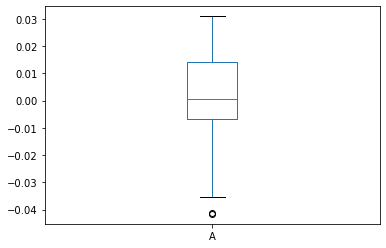



CWCO

Recent Price Pct: 13.305
Mean Price Pct: 0.0027762966643345185
Price Pct std. deviation: 0.020982653629593447
The stock is more volatile than the market.


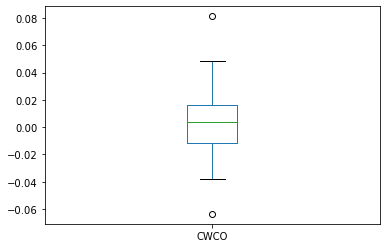



XYL

Recent Price Pct: 101.27
Mean Price Pct: 0.0021996337218057166
Price Pct std. deviation: 0.016465000828567045
The stock is more volatile than the market.


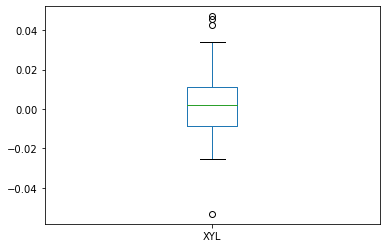

In [56]:
# Loop through the stocks in the green_agriculture portfolio and compare their performance
# with the sp500.
for stock_ticker in df_daily_returns_green_agriculture:

    # Get most recent price
    stock_recent_price = green_agriculture_df[stock_ticker]["close"][-1]

    # Calculate the mean price percent change
    stock_mean = calculate_mean(df_daily_returns_green_agriculture[stock_ticker])
    
    # Calculate the standard deviation of the percent change
    stock_std = calculate_standard_deviation(df_daily_returns_green_agriculture[stock_ticker])
    
    # Print the stock name and calculated statistics
    print(f"{stock_ticker}\n")
    print(f"Recent Price Pct: {stock_recent_price}")
    print(f"Mean Price Pct: {stock_mean}")
    print(f"Price Pct std. deviation: {stock_std}")
    
    # Compare the stock's volatility with the underlying market
    compare_volatility(stock_std, spy_std)

    # Display daily returns box plot
    df_daily_returns_green_agriculture[stock_ticker].plot.box()
    plt.show()
    print("\n")

In [57]:
# Average annual return for green_agriculture portolio
average_annual_return(df_daily_returns_green_agriculture)

TRMB    1.180640
A       0.552754
CWCO    0.699627
XYL     0.554308
dtype: float64

In [58]:
# Annualized standard deviation for green_agriculture portfolio
annualized_standard_deviation(df_daily_returns_green_agriculture)

TRMB    0.315543
A       0.230255
CWCO    0.333089
XYL     0.261374
dtype: float64

In [59]:
# Sharpe ratios for green_agriculture portfolio
sharpe_ratio_green_agriculture = sharpe_ratio(df_daily_returns_green_agriculture)
sharpe_ratio(df_daily_returns_green_agriculture)

TRMB    3.741619
A       2.400615
CWCO    2.100418
XYL     2.120747
dtype: float64

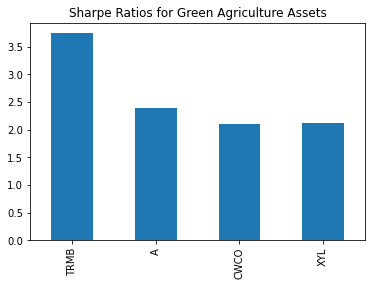

In [60]:
# Plot of Sharpe ratios for green_agriculture portfolio
sharpe_ratio_green_agriculture.plot.bar(title="Sharpe Ratios for Green Agriculture Assets")

plt.show()

In [61]:
#MONTE CARLO SIMULATIONS: GREEN AUTO ASSETS

In [62]:
# Set parameters of simulations
num_sims = 500
num_years = 1
green_auto_weights = [.125, .125, .125, .125, .125, .125, .125, .125]
initial_investment = 1000

In [63]:
# Configure Monte Carlo simulation for green_auto portolio
MC_green_auto = MCSimulation(
    portfolio_data = green_auto_df,
    weights= green_auto_weights,
    num_simulation = num_sims,
    num_trading_days = 252 * num_years
)

In [64]:
# Run Monte Carlo simulations to forecast one year daily returns
MC_green_auto.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.044732,1.055352,1.020970,1.061481,1.011952,0.982362,0.993993,1.016128,1.012524,1.009138,...,1.020735,0.987122,0.997293,1.019305,0.996639,0.980933,1.043447,1.043174,1.054728,0.984403
2,1.082843,1.069222,1.031030,1.069320,1.018226,0.982377,0.991485,1.049057,1.027635,1.013469,...,1.081689,0.936458,1.015579,1.035675,1.017972,1.010250,1.053385,1.081838,1.075547,0.993588
3,1.102683,1.128338,0.994042,1.138042,0.991115,0.986635,1.004185,1.046191,1.058217,1.044224,...,1.070919,0.919229,1.027961,1.073907,1.010657,0.970639,1.084680,1.114456,1.070625,1.018750
4,1.142005,1.145139,0.952928,1.157620,0.986393,1.035465,0.982611,1.074022,1.072570,1.037193,...,1.068631,0.912175,0.997243,1.074848,1.015864,0.970284,1.133185,1.115529,1.105446,0.989827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,21.367418,13.672940,11.970666,9.286568,13.032289,9.175233,14.660476,9.895475,18.730907,13.617482,...,18.952358,8.312110,19.198089,20.739478,16.809227,9.449755,13.604963,15.374537,12.572105,23.486937
249,21.798382,13.652678,12.212241,9.473756,12.981672,9.227065,14.490618,9.985171,18.948080,13.230414,...,19.324533,8.312485,19.902575,21.171792,17.245922,9.477975,13.806379,15.617213,12.643601,24.716811
250,20.888333,13.584941,12.515752,9.538885,13.109941,9.616118,14.288239,10.299041,19.712830,12.935825,...,19.222544,8.443115,20.041901,20.764562,18.135127,9.392057,14.467455,15.346646,12.746639,25.652139
251,21.714444,13.655729,13.042262,9.508536,13.039574,9.366040,14.429719,10.556155,19.308215,13.711396,...,19.834417,8.573546,20.067007,20.459395,18.937245,10.044722,14.605515,15.818292,12.916344,25.431811


In [65]:
# Compute summary statistics from the simulated daily returns
simulated_returns_data = {
    "mean": list(MC_green_auto.simulated_return.mean(axis=1)),
    "median": list(MC_green_auto.simulated_return.median(axis=1)),
    "min": list(MC_green_auto.simulated_return.min(axis=1)),
    "max": list(MC_green_auto.simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics
df_simulated_returns = pd.DataFrame(simulated_returns_data)

# Display sample data
df_simulated_returns.head()

,mean,median,min,max
0,1.000000,1.000000,1.000000,1.000000
1,1.008745,1.007970,0.938748,1.090667
2,1.019674,1.020439,0.894459,1.123905
3,1.031568,1.029990,0.878363,1.178527
4,1.042321,1.039609,0.875400,1.234080


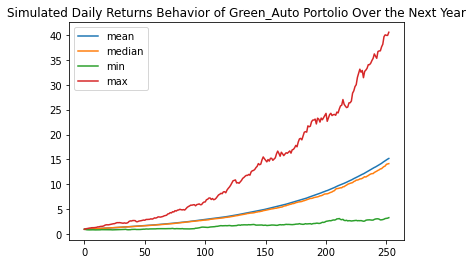

In [66]:
# Visually analyze the trajectory of green_auto portfolio daily returns on the next year of trading days simulation
simulated_returns_plot = df_simulated_returns.plot(title="Simulated Daily Returns Behavior of Green_Auto Portolio Over the Next Year")
simulated_returns_plot.get_figure().savefig("MC_green_auto_one_year.png", bbox_inches="tight")

In [67]:
# Progression of daily returns in terms of money
cumulative_pnl = initial_investment * df_simulated_returns

# Display sample data
cumulative_pnl.head()

,mean,median,min,max
0,1000.000000,1000.000000,1000.000000,1000.000000
1,1008.745261,1007.969998,938.748199,1090.666781
2,1019.673668,1020.438862,894.458648,1123.905290
3,1031.568240,1029.990221,878.362633,1178.527464
4,1042.320953,1039.608621,875.400469,1234.079724


In [68]:
# Summary statistics from the Monte Carlo simulation results
summary_statistics_green_auto = MC_green_auto.summarize_cumulative_return()

print(summary_statistics_green_auto)

count           500.000000
mean             15.200964
std               6.309359
min               3.325549
25%              10.353475
50%              14.169717
75%              18.812690
max              40.522224
95% CI Lower      5.568294
95% CI Upper     29.239452
Name: 252, dtype: float64


In [69]:
# Calculate the range of the possible outcomes within 95% CI of investments in green_auto portfolio
ci_lower = summary_statistics_green_auto[8]*initial_investment
ci_upper = summary_statistics_green_auto[9]*initial_investment

# Print results
print(f"There is a 95% chance that an initial investment of $1,000 in the portfolio"
      f" over the next year will end within in the range of"
      f" ${ci_lower:,.2f} and ${ci_upper:,.2f}.")

There is a 95% chance that an initial investment of $1,000 in the portfolio over the next year will end within in the range of $5,568.29 and $29,239.45.


In [70]:
#MONTE CARLO SIMULATIONS: GREEN BUILDING ASSETS

In [71]:
# Set parameters of simulations
num_sims = 500
num_years = 1
green_building_weights = [.25, .25, .25, .25]
initial_investment = 1000

In [72]:
# Configure Monte Carlo simulation for green_building portolio
MC_green_building = MCSimulation(
    portfolio_data = green_building_df,
    weights= green_building_weights,
    num_simulation = num_sims,
    num_trading_days = 252 * num_years
)

In [73]:
# Run Monte Carlo simulations to forecast one year daily returns
MC_green_building.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997462,1.009779,1.005261,1.018278,0.995419,0.995145,1.012884,1.010275,0.986795,1.001001,...,0.997566,1.012721,1.005734,1.007097,1.000424,1.011861,1.005342,0.995383,0.998251,1.003471
2,0.996757,1.009406,0.997293,1.033087,0.987047,0.998126,1.026531,0.992806,0.992810,1.001873,...,1.009720,1.007825,1.000579,0.998506,1.012509,1.000619,1.004171,0.998999,1.004946,1.003616
3,0.993512,1.017086,0.998530,1.034556,0.982696,1.004899,1.052622,1.006008,1.008956,1.002885,...,1.020014,1.002061,1.004843,0.987459,1.025581,1.021731,1.019344,0.988613,0.986283,1.029957
4,1.005203,1.029901,0.979269,1.048385,0.990715,1.014325,1.044268,1.003944,1.010775,0.995335,...,1.029329,0.999293,1.013702,0.988056,1.032863,1.023823,1.021752,0.991230,0.995453,1.036462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,2.092707,1.463949,1.261122,1.931351,1.711883,1.726288,2.089742,1.424430,2.118648,2.300393,...,1.586934,1.869266,1.407253,1.457901,1.305670,1.826800,1.558084,2.517697,2.027906,1.608021
249,2.133344,1.490469,1.271421,1.912409,1.710442,1.749705,2.127378,1.425713,2.156355,2.290985,...,1.600848,1.903078,1.416477,1.487788,1.304355,1.851923,1.559984,2.525605,1.981727,1.596901
250,2.097304,1.475919,1.295852,1.928711,1.682570,1.749503,2.149115,1.435235,2.176186,2.306354,...,1.586944,1.927399,1.406173,1.486065,1.315023,1.831308,1.556843,2.495134,1.993818,1.589374
251,2.109442,1.480556,1.295692,1.927106,1.682462,1.783029,2.166382,1.447971,2.206329,2.286048,...,1.597516,1.946468,1.390965,1.477082,1.306529,1.843662,1.564428,2.475681,1.999313,1.591675


In [74]:
# Compute summary statistics from the simulated daily returns
simulated_returns_data = {
    "mean": list(MC_green_building.simulated_return.mean(axis=1)),
    "median": list(MC_green_building.simulated_return.median(axis=1)),
    "min": list(MC_green_building.simulated_return.min(axis=1)),
    "max": list(MC_green_building.simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics
df_simulated_returns = pd.DataFrame(simulated_returns_data)

# Display sample data
df_simulated_returns.head()

,mean,median,min,max
0,1.000000,1.000000,1.000000,1.000000
1,1.002096,1.001938,0.972535,1.031929
2,1.004198,1.003940,0.959760,1.052503
3,1.006045,1.004569,0.954606,1.068025
4,1.007593,1.006071,0.951241,1.072209


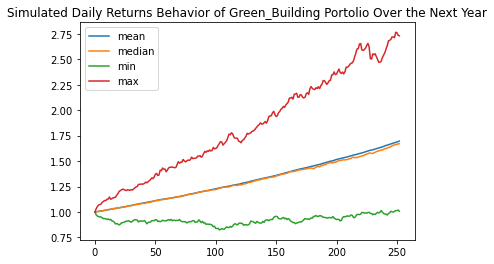

In [75]:
# Visually analyze the trajectory of green_building portfolio daily returns on the next year of trading days simulation
simulated_returns_plot = df_simulated_returns.plot(title="Simulated Daily Returns Behavior of Green_Building Portolio Over the Next Year")
simulated_returns_plot.get_figure().savefig("MC_green_building_one_year.png", bbox_inches="tight")

In [76]:
# Progression of daily returns in terms of money
cumulative_pnl = initial_investment * df_simulated_returns

# Display sample data
cumulative_pnl.head()

,mean,median,min,max
0,1000.000000,1000.000000,1000.000000,1000.000000
1,1002.095883,1001.937509,972.535069,1031.928729
2,1004.197853,1003.940381,959.760291,1052.503493
3,1006.045342,1004.568736,954.606068,1068.024525
4,1007.593252,1006.070831,951.241161,1072.208750


In [77]:
# Summary statistics from the Monte Carlo simulation results
summary_statistics_green_building = MC_green_building.summarize_cumulative_return()

print(summary_statistics_green_building)

count           500.000000
mean              1.696424
std               0.279663
min               1.007463
25%               1.489207
50%               1.670296
75%               1.867937
max               2.730557
95% CI Lower      1.240354
95% CI Upper      2.284286
Name: 252, dtype: float64


In [78]:
# Calculate the range of the possible outcomes within 95% CI of investments in green_building portfolio
ci_lower = summary_statistics_green_building[8]*initial_investment
ci_upper = summary_statistics_green_building[9]*initial_investment

# Print results
print(f"There is a 95% chance that an initial investment of $1,000 in the green_building portfolio"
      f" over the next year will end within in the range of"
      f" ${ci_lower:,.2f} and ${ci_upper:,.2f}.")

There is a 95% chance that an initial investment of $1,000 in the green_building portfolio over the next year will end within in the range of $1,240.35 and $2,284.29.


In [79]:
#MONTE CARLO SIMULATIONS: GREEN ENERGY ASSETS

In [80]:
# Set parameters of simulations
num_sims = 500
num_years = 1
green_energy_weights = [.11, .11, .11, .11, .11, .11, .11, .11, .11]
initial_investment = 1000

In [81]:
# Configure Monte Carlo simulation for green_energy portolio
MC_green_energy = MCSimulation(
    portfolio_data = green_energy_df,
    weights= green_energy_weights,
    num_simulation = num_sims,
    num_trading_days = 252 * num_years
)

In [82]:
# Run Monte Carlo simulations to forecast one year daily returns
MC_green_energy.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.978680,1.007914,0.989243,1.006096,1.003587,1.001295,1.021329,1.013815,0.984068,0.991945,...,0.964752,0.985478,0.951611,0.983725,1.024105,0.984653,1.003386,1.006488,0.999226,1.020651
2,0.964971,1.043823,0.966877,1.012100,0.999850,1.005922,0.999687,0.986968,0.987100,1.015675,...,0.951297,0.989910,0.940985,0.991489,1.032589,0.950858,0.999495,0.990474,1.028101,1.031864
3,0.959693,1.069152,0.976343,0.978662,0.997071,1.002718,0.995722,0.982431,0.978630,1.027924,...,0.934488,1.007379,0.986788,0.972134,1.042313,0.959572,1.009912,0.961919,1.030022,1.043088
4,0.965762,1.050226,0.982692,0.980973,0.998773,1.000615,0.989418,0.982407,0.999015,1.048039,...,0.935325,1.033559,0.991735,0.965149,1.003785,0.946865,1.014413,0.998885,1.013550,1.038441
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,1.427195,2.124843,2.561775,1.677056,2.324265,1.916916,2.159352,1.730291,2.048018,1.682504,...,1.070267,2.648789,2.732721,1.776959,2.031053,1.173531,1.819655,1.583760,1.470641,2.266030
249,1.443090,2.107464,2.597410,1.674610,2.318270,1.907286,2.154798,1.689255,2.044492,1.682642,...,1.061189,2.619100,2.673613,1.782547,2.082091,1.158048,1.823582,1.564290,1.452956,2.294987
250,1.422346,2.087458,2.585805,1.683540,2.357505,1.900043,2.151252,1.694809,2.053149,1.684689,...,1.070228,2.613208,2.669378,1.739973,2.078680,1.182738,1.794754,1.529554,1.426572,2.261697
251,1.406943,2.145823,2.588984,1.661918,2.328076,1.923222,2.133196,1.703797,2.091480,1.654623,...,1.088273,2.669475,2.560692,1.729813,2.107432,1.221211,1.796730,1.501462,1.485733,2.270349


In [83]:
# Compute summary statistics from the simulated daily returns
simulated_returns_data = {
    "mean": list(MC_green_energy.simulated_return.mean(axis=1)),
    "median": list(MC_green_energy.simulated_return.median(axis=1)),
    "min": list(MC_green_energy.simulated_return.min(axis=1)),
    "max": list(MC_green_energy.simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics
df_simulated_returns = pd.DataFrame(simulated_returns_data)

# Display sample data
df_simulated_returns.head()

,mean,median,min,max
0,1.000000,1.000000,1.000000,1.000000
1,1.002730,1.003389,0.942136,1.045927
2,1.004628,1.004693,0.934386,1.066031
3,1.007465,1.007754,0.915828,1.084318
4,1.009393,1.008782,0.908034,1.108939


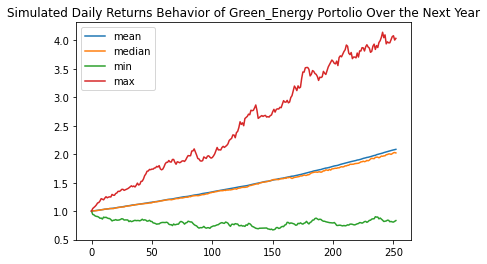

In [84]:
# Visually analyze the trajectory of green_energy portfolio daily returns on the next year of trading days simulation
simulated_returns_plot = df_simulated_returns.plot(title="Simulated Daily Returns Behavior of Green_Energy Portolio Over the Next Year")
simulated_returns_plot.get_figure().savefig("MC_green_energy_one_year.png", bbox_inches="tight")

In [85]:
# Progression of daily returns in terms of money
cumulative_pnl = initial_investment * df_simulated_returns

# Display sample data
cumulative_pnl.head()

,mean,median,min,max
0,1000.000000,1000.000000,1000.000000,1000.000000
1,1002.729820,1003.389349,942.136450,1045.927045
2,1004.627989,1004.692962,934.385674,1066.031189
3,1007.464723,1007.753979,915.827730,1084.318147
4,1009.392981,1008.782050,908.034423,1108.939001


In [86]:
# Summary statistics from the Monte Carlo simulation results
summary_statistics_green_energy = MC_green_energy.summarize_cumulative_return()

print(summary_statistics_green_energy)

count           500.000000
mean              2.085589
std               0.551431
min               0.834338
25%               1.704416
50%               2.022674
75%               2.421459
max               4.035330
95% CI Lower      1.165279
95% CI Upper      3.231610
Name: 252, dtype: float64


In [87]:
# Calculate the range of the possible outcomes within 95% CI of investments in green_energy portfolio
ci_lower = summary_statistics_green_energy[8]*initial_investment
ci_upper = summary_statistics_green_energy[9]*initial_investment

# Print results
print(f"There is a 95% chance that an initial investment of $1,000 in the green_energy portfolio"
      f" over the next year will end within in the range of"
      f" ${ci_lower:,.2f} and ${ci_upper:,.2f}.")

There is a 95% chance that an initial investment of $1,000 in the green_energy portfolio over the next year will end within in the range of $1,165.28 and $3,231.61.


In [88]:
#MONTE CARLO SIMULATIONS: GREEN AGRICULTURAL ASSETS

In [89]:
# Set parameters of simulations
num_sims = 500
num_years = 1
green_agriculture_weights = [.25, .25, .25, .25]
initial_investment = 1000

In [90]:
# Configure Monte Carlo simulation for green_agriculture portolio
MC_green_agriculture = MCSimulation(
    portfolio_data = green_agriculture_df,
    weights= green_agriculture_weights,
    num_simulation = num_sims,
    num_trading_days = 252 * num_years
)

In [91]:
# Run Monte Carlo simulations to forecast one year daily returns
MC_green_agriculture.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997204,1.014214,1.022975,1.015703,1.004176,0.993530,1.009556,1.006605,1.007682,0.984303,...,1.017990,1.017195,1.003241,0.999377,1.006444,1.003593,1.010608,0.990749,0.994231,0.988896
2,0.991065,1.010502,1.031392,1.007337,1.012811,0.986721,1.011724,1.012843,1.006064,0.993506,...,1.025738,1.026132,0.994613,1.018361,0.997013,1.015972,1.012123,0.996338,1.019144,0.996629
3,0.976530,1.014461,1.046114,0.993129,0.997705,0.989327,1.012377,1.023673,1.005133,0.991434,...,1.039066,1.014221,0.993223,1.022593,1.002474,1.012077,1.017887,1.005748,1.011901,1.002072
4,0.997816,1.022297,1.043546,0.986242,1.002976,1.003484,1.000350,1.026077,0.997367,1.003024,...,1.046473,1.013782,0.986488,1.029339,1.010119,1.014013,1.009558,1.011209,1.032414,1.009182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,1.906943,2.286924,2.147263,2.052212,1.771954,2.533027,1.625323,2.132530,2.478168,2.000518,...,2.428985,2.106428,1.542918,2.160044,2.052260,1.845459,1.980035,1.923197,2.652007,1.775360
249,1.930203,2.305098,2.169679,2.038295,1.773806,2.552796,1.625317,2.144078,2.471585,2.031656,...,2.403367,2.128993,1.555087,2.113413,2.062987,1.865263,1.956411,1.936766,2.692828,1.780598
250,1.925538,2.353804,2.181912,2.004193,1.770336,2.552875,1.616212,2.153808,2.462597,2.038752,...,2.446082,2.120218,1.543698,2.120794,2.082202,1.876208,1.969786,1.949001,2.731123,1.822850
251,1.951720,2.339599,2.186511,1.999748,1.774143,2.578534,1.612422,2.155568,2.436941,2.034493,...,2.453882,2.112330,1.547107,2.134162,2.103816,1.841928,1.983392,1.968194,2.717947,1.833985


In [92]:
# Compute summary statistics from the simulated daily returns
simulated_returns_data = {
    "mean": list(MC_green_agriculture.simulated_return.mean(axis=1)),
    "median": list(MC_green_agriculture.simulated_return.median(axis=1)),
    "min": list(MC_green_agriculture.simulated_return.min(axis=1)),
    "max": list(MC_green_agriculture.simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics
df_simulated_returns = pd.DataFrame(simulated_returns_data)

# Display sample data
df_simulated_returns.head()

,mean,median,min,max
0,1.000000,1.000000,1.000000,1.000000
1,1.003015,1.003203,0.977781,1.030633
2,1.006020,1.006085,0.955271,1.042813
3,1.008487,1.008368,0.947957,1.051590
4,1.011898,1.011179,0.945010,1.068056


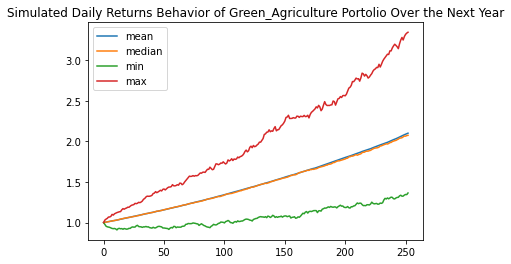

In [93]:
# Visually analyze the trajectory of green_agriculture portfolio daily returns on the next year of trading days simulation
simulated_returns_plot = df_simulated_returns.plot(title="Simulated Daily Returns Behavior of Green_Agriculture Portolio Over the Next Year")
simulated_returns_plot.get_figure().savefig("MC_green_agriculture_one_year.png", bbox_inches="tight")

In [94]:
# Progression of daily returns in terms of money
cumulative_pnl = initial_investment * df_simulated_returns

# Display sample data
cumulative_pnl.head()

,mean,median,min,max
0,1000.000000,1000.000000,1000.000000,1000.000000
1,1003.014504,1003.203019,977.781452,1030.633019
2,1006.020181,1006.085275,955.271269,1042.812875
3,1008.487431,1008.367550,947.957202,1051.590489
4,1011.898180,1011.178821,945.010199,1068.056015


In [96]:
# Summary statistics from the Monte Carlo simulation results
summary_statistics_green_agriculture = MC_green_agriculture.summarize_cumulative_return()

print(summary_statistics_green_agriculture)

count           500.000000
mean              2.101573
std               0.302944
min               1.364520
25%               1.908051
50%               2.074972
75%               2.293344
max               3.345393
95% CI Lower      1.547005
95% CI Upper      2.728307
Name: 252, dtype: float64


In [97]:
# Calculate the range of the possible outcomes within 95% CI of investments in green_agriculture portfolio
ci_lower = summary_statistics_green_agriculture[8]*initial_investment
ci_upper = summary_statistics_green_agriculture[9]*initial_investment

# Print results
print(f"There is a 95% chance that an initial investment of $1,000 in the green_energy portfolio"
      f" over the next year will end within in the range of"
      f" ${ci_lower:,.2f} and ${ci_upper:,.2f}.")

There is a 95% chance that an initial investment of $1,000 in the green_energy portfolio over the next year will end within in the range of $1,547.00 and $2,728.31.
